In [1]:
import pandas as pd
import math

In [10]:
df = pd.read_table('noslignesdedesirs_mylene.tsv')

In [11]:
radius = 6371

In [15]:
class referencePoint:
    def __init__(self, scrX, scrY, lat, lng):
        self.scrX = scrX
        self.scrY = scrY
        self.lat = lat
        self.lng = lng


# Calculate global X and Y for top-left reference point        
p0 = referencePoint(0, 0, 45.590231380357075, -73.68553872266351)
# Calculate global X and Y for bottom-right reference point
p1 = referencePoint(2244, 2060, 45.55443164693175, -73.59927931059248)

In [12]:
# This function converts lat and lng coordinates to GLOBAL X and Y positions
def latlngToGlobalXY(lat, lng):
     # Calculates x based on cos of average of the latitudes
    x = radius*lng*math.cos((p0.lat + p1.lat)/2)
    # Calculates y based on latitude
    y = radius*lat
    return {'x': x, 'y': y}


In [22]:
all_pos = latlngToGlobalXY(df["latitude"],df["longitude"])


In [23]:
global_x =all_pos['x'].to_numpy()
global_y =all_pos['y'].to_numpy()

In [24]:
df['global_x'] = global_x
df['global_y'] = global_y

In [25]:
df

,Unnamed: 0,latitude,longitude,global_x,global_y
0,0,45.570873,-73.632873,9024.295512,290332.031883
1,1,45.586626,-73.597534,9019.964436,290432.394246
2,2,45.569048,-73.635397,9024.604848,290320.404808
3,3,45.565422,-73.607294,9021.160602,290297.303562
4,4,45.577656,-73.609994,9021.491508,290375.246376
5,5,45.574599,-73.609656,9021.450084,290355.770229
6,6,45.543744,-73.613808,9021.958944,290159.193024
7,7,45.563230,-73.623468,9023.142854,290283.338330
8,8,45.563062,-73.617430,9022.402849,290282.268002
9,9,45.559727,-73.600007,9020.267522,290261.020717


<AxesSubplot:xlabel='global_x', ylabel='global_y'>

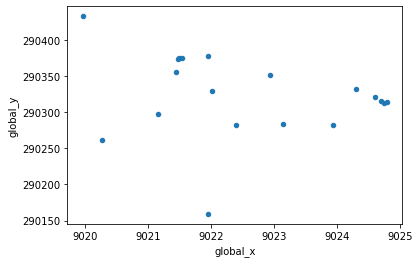

In [26]:
df.plot.scatter(x = 'global_x', y = 'global_y')
